In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from matplotlib import pyplot as plt

In [2]:
model = load_model('model-004.model')  #load best performing model from disk

In [3]:
# label dictionary for each image class and color dictionary for bounding boxes
labels_dict = {0:'correctly_worn', 1:'incorrectly_worn', 2:'no_mask'}
color_dict = {0:(0,255,0), 1:(0,255,255), 2:(0,0,255)}

In [4]:
# import face detection classifier

classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [5]:
size = 1
webcam = cv2.VideoCapture(0)

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1)
    im_color=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    mini = cv2.resize(im_color, (im_color.shape[1] // size, im_color.shape[0] // size))
    
    faces = classifier.detectMultiScale(mini)
    
    for f in faces:
        (x, y, w, h) = [v * size for v in f]
        face_img = im_color[y-65:y+h+35, x-45:x+w+45]
        resized = cv2.resize(face_img, (224,224))
        normalized = resized/255.0
        reshaped=np.reshape(normalized,(1,224,224,3))
        reshaped= np.vstack([reshaped])
        result = model.predict(reshaped)
        #print(result)
        
        label = np.argmax(result,axis=1)[0]
        
        cv2.rectangle(im,(x-40,y-40),(x+40+w,y+h+40),color_dict[label],2)
        cv2.rectangle(im,(x,y),(x+w,y),color_dict[label],-1)
        cv2.putText(im,labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow('Facemask Detector', im)
    key = cv2.waitKey(10)
    if key == 27: # ESC key
        break
        
webcam.release()

cv2.destroyAllWindows()

In [65]:
faces

array([[ 86, 102,  79,  79]], dtype=int32)

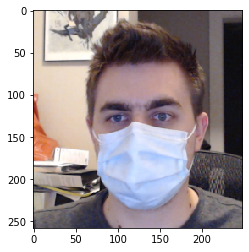

In [66]:
plt.imshow(face_img, interpolation = 'nearest')
#plt.savefig('faceexample.png', dpi=200, format='png') # save image to disk
plt.show()

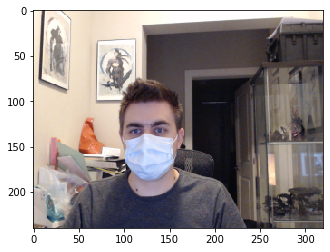

In [68]:
plt.imshow(mini, interpolation = 'nearest')
plt.show()